# Preparation

Pada tahap ini kita perlu mempersiapkan data yang akan dianalisa serta module yang akan dioperasikan

*   Import modul yang dibutuhkan.
*   Upload data (Bisa .xlsx , .csv , .html , dll) yang ingin dianalisa dan jadikan sebuah dataframe.



In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

In [82]:
df = pd.read_csv('Telco Customer Churn.csv')

# Handling Missing Value

Pada bagian ini kita akan melakukan handling terhadap missing value (data yang hilang atau bernilai kosong)

Ada 2 hal yang perlu di cek saat melakukan handling missing value :

*   Value yang bernilai 0 dan terbaca program sebagai NA
*   Value yang bernilai 0 dan tidak terbaca program sebagai NA

In [11]:
#Pertama kita harus melihat ukuran dari data yang digunakan, output yang akan tampil adalah (row, column)
df.shape

(7043, 21)

In [24]:
#Pada pengecekan pertama kita akan mencari nilai 0 yang terbaca sebagai NA
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

#Variable menunjukkan nama row data yang ter-display
#Missing Values menunjukkan berapa data yang masih terbaca program sebagai 0
#Filling Factor menunjukkan persentasi data yang sudah terisi

,variable,missing values,filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


Kesimpulan dari data tersebut tidak ditemukan missing value yang terbaca sebagai NA oleh program. **Tetapi perlu diperhatikan,** ada jenis missing value yang tidak terbaca NA oleh program namun dapat diketahui dengan pemahaman user seperti contoh " " (spasi).

In [25]:
x = df.sort_values(by=['TotalCharges'])
x.head(15)

#Pada kolom "TotalCharges" terdapat data kosong yang terisi dengan spasi.
#Hal ini dapat diketahui karena hanya beberapa row yang terisi dengan spasi, sementara row lain terisi oleh data numerik

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [83]:
#Karena terdapat missing value pada pengecekan kedua, maka kita perlu melakukan filling terhadap variabel tersebut
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:0 if x ==' ' else x)

In [31]:
#Ketika dicek ulang nilai x.head(15) data tersebut belum berubah, maka kemungkinan ada yang salah pada bagian dtypes
df.dtypes
#Bisa kita lihat TotalCharges masih bertype objek, sehingga tidak bisa terisi karena dtypes yang kita masukkan adalah int
#Perlu diperhatikan juga apabila digantikan integer, maka data yang lain akan error karena ada nilai "." pada valuenya
#Oleh karena itu kita perlu memasukkan dtypes sebagai "float"

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [35]:
#Pada step ini maka seharusnya data sudah terfilling
x = df.sort_values(by=['TotalCharges'])
x.head(15)

#Pada step ini, semua missing value sudah berhasil di handling secara sempurna

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.00,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.00,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.00,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.00,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.00,No


# Categorical Data Encoding

Pada bagian ini kita akan melakukan encoding terhadap beberapa variable dengan fokus terhadap data categorical dan undropped data. Dimana pada bagian ini kita menggunakan data dummy sebagai pendamping dataframe awal.

In [36]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [85]:
#Saya ingin menambahkan 1 cell dari penjelasan mentor mas Dio
#Pada step ini, perlu dilakukan pengubahan data menjadi object sebelum dilakukan encoding
#Hal ini dikarenakan pada variabel 'SeniorCitizen' harusnya berupa 'Yes' dan 'No'
#Sehingga pada saat encoding, variabel ini akan ter-distinct menjadi 2 column yang berbeda

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:'Yes' if x ==1 else 'No')

In [86]:
#Sebelum membuat data dummy, perlu diperhatikan bahwa pada dataframe awal terdapat variable customer id,
#Dimana pada customer id ini merupakan unique character yang berbeda setiap baris
#Maka dari itu perlu kita lakukan drop sesuai axis. Serta inplace untuk meng-overwrite df

df.drop('customerID', axis=1, inplace=True)

In [87]:
#Pada step ini saya sedikit berbeda dengan mas Dio, perbedaan ada pada variable 'Churn'
#Menurut saya 'Churn' seharusnya tetap pada satu kolom karena merupakan variable target untuk prediksi pada ML
#Berkebalikan dengan 'SeniorCitizen' menurut saya 'Churn' harus disatukan menjadi 1 column

df['Churn'] = df['Churn'].apply(lambda x:1 if x =='Yes' else 0)

#Pada step ini, variabel Churn berubah menjadi 1 dan 0
#Variabel Churn sendiri merupakan variabel yang menentukan apakah pelanggan tersebut akan kembali berlangganan atau tidak
#Yes == 1 , berarti berhenti berlangganan
#No == 0 , berarti lanjut berlangganan

In [88]:
#Setelah itu, barulah kita satukan df yang sudah dibuat dengan data dummy
df_dummy = pd.get_dummies(df)
df_dummy.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,8,99.65,820.50,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,22,89.10,1949.40,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,10,29.75,301.90,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,28,104.80,3046.05,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,62,56.15,3487.95,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


# Handling Outlier & Anomalies

Pada bagian ini, kita akan melakukan outlier dan anomalies handling terhadap dataframe. Namun sebelum melakukan outlier handling kita harus mengecek apakah dataframe memiliki outlier atau tidak.

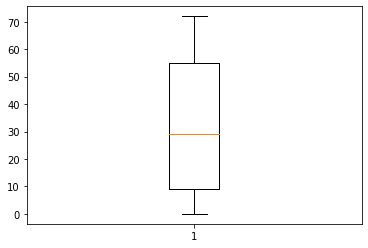

In [79]:
#Berdasarkan dataframe, bagian yang paling mungkin terdapat outlier adalah di bagian tenure, monthly charge, dan total charge
#Hal ini karena selain variabel tersebut, semua merupakan categorical variable
#Pada step ini, saya akan melakukan outlier check menggunakan boxplot

import matplotlib.pyplot as plt
plt.boxplot(df_dummy['tenure'])
plt.show()


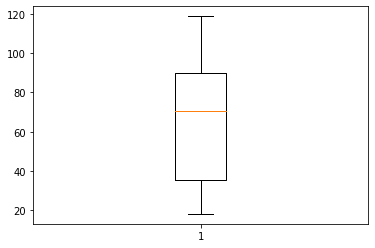

In [80]:
import matplotlib.pyplot as plt
plt.boxplot(df_dummy['MonthlyCharges'])
plt.show()

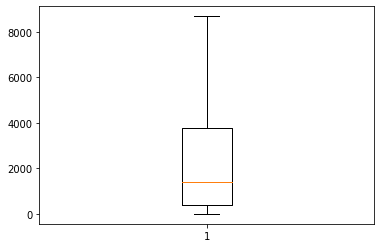

In [81]:
import matplotlib.pyplot as plt
plt.boxplot(df_dummy['TotalCharges'])
plt.show()

Dari ketiga data tersebut, dapat disimpulkan bahwa dataframe tidak memiliki outlier. Tetapi dataframe memiliki data anomalies berupa spasi pada bagian "TotalCharges" yang sudah dihandling terlebih dulu pada bagian missing value.

# Conclusion

Berikut adalah kesimpulan yang didapat terhadap analisa dataframe "Telco Customer Churn.csv"

*   Data tersebut merupakan data dengan jumlah 7043 row serta 21 column. Data berisi variabel yang, pada akhirnya, digunakan acuan untuk memprediksi apakah seorang customer akan kembali berlangganan atau tidak.
*   Data tersebut tidak memiliki missing value (filling factor 100%).
*   Pada label encoding, variabel "SeniorCitizen" dan "Churn" perlu di-encoding secara berbeda. Dimana variabel "SeniorCitizen" harus diubah menjadi category "Yes" dan "No" dan "Churn" diubah menjadi 0 dan 1. Hal ini karena kedua variabel tersebut memiliki konfigurasi akhir yang berbeda (di-distinct atau tidak).
*   Data tersebut tidak memiliki outlier akan tetapi memiliki anomalies dimana pada variabel "TotalCharges" terdapat value " " sehingga tidak terbaca oleh program sebagai missing value. Yang dimana pada tugas ini data tersebut diisi value 0.